# Estimated Time Arrival

## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Preprocessing

### Load Datasets

In [2]:
from_warehouse_df = pd.read_csv('../Datasets/results-fromwarehouse.csv')
from_warehouse_df.head()

,lat_origin,long_origin,lat_destination,long_destination,Jarak,Waktu Tempuh,Waktu Penulisan,Link
0,-6.395965,106.897527,-6.444471,106.72434,"40,6 km",1 jam 2 mnt,2025-03-20 10:06:55,"https://www.google.com/maps/dir/'-6.395965,106..."
1,-6.395965,106.897527,-6.444471,106.72434,"50,0 km",1 jam 2 mnt,2025-03-20 10:06:56,"https://www.google.com/maps/dir/'-6.395965,106..."
2,-6.395965,106.897527,-6.16938,106.609849,"55,6 km",1 jam 4 mnt,2025-03-20 10:07:16,"https://www.google.com/maps/dir/'-6.395965,106..."
3,-6.395965,106.897527,-6.16938,106.609849,"55,6 km",1 jam 6 mnt,2025-03-20 10:07:16,"https://www.google.com/maps/dir/'-6.395965,106..."
4,-6.395965,106.897527,-6.245515,106.963095,"28,1 km",40 mnt,2025-03-20 10:07:36,"https://www.google.com/maps/dir/'-6.395965,106..."


In [3]:
random_location_df = pd.read_csv('../Datasets/results-allrandom.csv')
random_location_df.head()

,lat_origin,long_origin,lat_destination,long_destination,Jarak,Waktu Tempuh,Waktu Penulisan,Link
0,lat_origin,long_origin,lat_destination,long_destination,Jarak,Waktu Tempuh,Waktu Penulisan,Link
1,-6.403632,106.875937,-6.47717,106.860436,"11,5 km",29 mnt,2025-03-20 10:00:20,"https://www.google.com/maps/dir/'-6.403632,106..."
2,-6.403632,106.875937,-6.47717,106.860436,"15,7 km",29 mnt,2025-03-20 10:00:21,"https://www.google.com/maps/dir/'-6.403632,106..."
3,-6.277224,106.830669,-6.227915,106.969559,"27,4 km",47 mnt,2025-03-20 10:00:38,"https://www.google.com/maps/dir/'-6.277224,106..."
4,-6.277224,106.830669,-6.227915,106.969559,"27,2 km",49 mnt,2025-03-20 10:00:38,"https://www.google.com/maps/dir/'-6.277224,106..."


### Check the Dataset Stats

#### from_warehouse_df

In [4]:
from_warehouse_df.describe()

,lat_origin,long_origin,lat_destination,long_destination,Jarak,Waktu Tempuh,Waktu Penulisan,Link
count,45901,45901,45901,45901,45901,45901,45901,45901
unique,2,2,24270,24265,694,146,34308,27689
top,-6.395965,106.897527,lat_destination,long_destination,Jarak,48 mnt,Waktu Penulisan,Link
freq,45668,45668,233,233,233,1316,233,233


In [5]:
from_warehouse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45901 entries, 0 to 45900
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   lat_origin        45901 non-null  object
 1   long_origin       45901 non-null  object
 2   lat_destination   45901 non-null  object
 3   long_destination  45901 non-null  object
 4   Jarak             45901 non-null  object
 5   Waktu Tempuh      45901 non-null  object
 6   Waktu Penulisan   45901 non-null  object
 7   Link              45901 non-null  object
dtypes: object(8)
memory usage: 2.8+ MB


#### random_location_df

In [6]:
random_location_df.describe()

,lat_origin,long_origin,lat_destination,long_destination,Jarak,Waktu Tempuh,Waktu Penulisan,Link
count,47616,47616,47616,47616,47616,47616,47616,47616
unique,24388,24312,24411,24447,947,180,34958,28112
top,lat_origin,long_origin,lat_destination,long_destination,Jarak,51 mnt,Waktu Penulisan,Link
freq,234,234,234,234,234,952,234,234


In [7]:
random_location_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47616 entries, 0 to 47615
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   lat_origin        47616 non-null  object
 1   long_origin       47616 non-null  object
 2   lat_destination   47616 non-null  object
 3   long_destination  47616 non-null  object
 4   Jarak             47616 non-null  object
 5   Waktu Tempuh      47616 non-null  object
 6   Waktu Penulisan   47616 non-null  object
 7   Link              47616 non-null  object
dtypes: object(8)
memory usage: 2.9+ MB


### Data Cleaning

#### Change Columns Name

In [8]:
from_warehouse_df.columns = ['lat_ori', 'long_ori', 'lat_dest', 'long_dest', 'distance', 'eta', 'timestamp', 'link']
from_warehouse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45901 entries, 0 to 45900
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   lat_ori    45901 non-null  object
 1   long_ori   45901 non-null  object
 2   lat_dest   45901 non-null  object
 3   long_dest  45901 non-null  object
 4   distance   45901 non-null  object
 5   eta        45901 non-null  object
 6   timestamp  45901 non-null  object
 7   link       45901 non-null  object
dtypes: object(8)
memory usage: 2.8+ MB


In [9]:
random_location_df.columns = ['lat_ori', 'long_ori', 'lat_dest', 'long_dest', 'distance', 'eta', 'timestamp', 'link']
random_location_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47616 entries, 0 to 47615
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   lat_ori    47616 non-null  object
 1   long_ori   47616 non-null  object
 2   lat_dest   47616 non-null  object
 3   long_dest  47616 non-null  object
 4   distance   47616 non-null  object
 5   eta        47616 non-null  object
 6   timestamp  47616 non-null  object
 7   link       47616 non-null  object
dtypes: object(8)
memory usage: 2.9+ MB


#### Remove Unused Columns

In [10]:
from_warehouse_df.drop('link', axis=1, inplace=True)
random_location_df.drop('link', axis=1, inplace=True)

from_warehouse_df.info()
random_location_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45901 entries, 0 to 45900
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   lat_ori    45901 non-null  object
 1   long_ori   45901 non-null  object
 2   lat_dest   45901 non-null  object
 3   long_dest  45901 non-null  object
 4   distance   45901 non-null  object
 5   eta        45901 non-null  object
 6   timestamp  45901 non-null  object
dtypes: object(7)
memory usage: 2.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47616 entries, 0 to 47615
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   lat_ori    47616 non-null  object
 1   long_ori   47616 non-null  object
 2   lat_dest   47616 non-null  object
 3   long_dest  47616 non-null  object
 4   distance   47616 non-null  object
 5   eta        47616 non-null  object
 6   timestamp  47616 non-null  object
dtypes: object(7)
memory usage: 2.5+ MB


#### Remove Unused Rows

In [11]:
from_warehouse_df = from_warehouse_df[from_warehouse_df.lat_ori != 'lat_origin']
from_warehouse_df = from_warehouse_df[from_warehouse_df.long_ori != 'long_origin']
from_warehouse_df = from_warehouse_df[from_warehouse_df.lat_dest != 'lat_destination']
from_warehouse_df = from_warehouse_df[from_warehouse_df.long_dest != 'long_destination']
from_warehouse_df = from_warehouse_df[from_warehouse_df.distance != 'Jarak']
from_warehouse_df = from_warehouse_df[from_warehouse_df.distance != 'Data tidak tersedia']
from_warehouse_df = from_warehouse_df[from_warehouse_df.eta != 'Waktu Tempuh']
from_warehouse_df = from_warehouse_df[from_warehouse_df.timestamp != 'Waktu Penulisan']

from_warehouse_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45667 entries, 0 to 45900
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   lat_ori    45667 non-null  object
 1   long_ori   45667 non-null  object
 2   lat_dest   45667 non-null  object
 3   long_dest  45667 non-null  object
 4   distance   45667 non-null  object
 5   eta        45667 non-null  object
 6   timestamp  45667 non-null  object
dtypes: object(7)
memory usage: 2.8+ MB


In [12]:
random_location_df = random_location_df[random_location_df.lat_ori != 'lat_origin']
random_location_df = random_location_df[random_location_df.long_ori != 'long_origin']
random_location_df = random_location_df[random_location_df.lat_dest != 'lat_destination']
random_location_df = random_location_df[random_location_df.long_dest != 'long_destination']
random_location_df = random_location_df[random_location_df.distance != 'Jarak']
random_location_df = random_location_df[random_location_df.distance != 'Data tidak tersedia']
random_location_df = random_location_df[random_location_df.eta != 'Waktu Tempuh']
random_location_df = random_location_df[random_location_df.timestamp != 'Waktu Penulisan']

random_location_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47379 entries, 1 to 47615
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   lat_ori    47379 non-null  object
 1   long_ori   47379 non-null  object
 2   lat_dest   47379 non-null  object
 3   long_dest  47379 non-null  object
 4   distance   47379 non-null  object
 5   eta        47379 non-null  object
 6   timestamp  47379 non-null  object
dtypes: object(7)
memory usage: 2.9+ MB


#### Change the Data Types

In [13]:
from_warehouse_df.lat_ori = pd.to_numeric(from_warehouse_df.lat_ori)
from_warehouse_df.long_ori = pd.to_numeric(from_warehouse_df.long_ori)
from_warehouse_df.lat_dest = pd.to_numeric(from_warehouse_df.lat_dest)
from_warehouse_df.long_dest = pd.to_numeric(from_warehouse_df.long_dest)

from_warehouse_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45667 entries, 0 to 45900
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat_ori    45667 non-null  float64
 1   long_ori   45667 non-null  float64
 2   lat_dest   45667 non-null  float64
 3   long_dest  45667 non-null  float64
 4   distance   45667 non-null  object 
 5   eta        45667 non-null  object 
 6   timestamp  45667 non-null  object 
dtypes: float64(4), object(3)
memory usage: 2.8+ MB


In [14]:
random_location_df.lat_ori = pd.to_numeric(random_location_df.lat_ori)
random_location_df.long_ori = pd.to_numeric(random_location_df.long_ori)
random_location_df.lat_dest = pd.to_numeric(random_location_df.lat_dest)
random_location_df.long_dest = pd.to_numeric(random_location_df.long_dest)

random_location_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47379 entries, 1 to 47615
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat_ori    47379 non-null  float64
 1   long_ori   47379 non-null  float64
 2   lat_dest   47379 non-null  float64
 3   long_dest  47379 non-null  float64
 4   distance   47379 non-null  object 
 5   eta        47379 non-null  object 
 6   timestamp  47379 non-null  object 
dtypes: float64(4), object(3)
memory usage: 2.9+ MB


In [15]:
from_warehouse_df.distance = from_warehouse_df.distance.str.replace(' km', '')
random_location_df.distance = random_location_df.distance.str.replace(' km', '')
from_warehouse_df.distance = from_warehouse_df.distance.str.replace(' m', '')
random_location_df.distance = random_location_df.distance.str.replace(' m', '')
from_warehouse_df.distance = from_warehouse_df.distance.str.replace(',', '.')
random_location_df.distance = random_location_df.distance.str.replace(',', '.')

In [16]:
from_warehouse_df.distance = pd.to_numeric(from_warehouse_df.distance)
random_location_df.distance = pd.to_numeric(random_location_df.distance)

from_warehouse_df.info()
random_location_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45667 entries, 0 to 45900
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat_ori    45667 non-null  float64
 1   long_ori   45667 non-null  float64
 2   lat_dest   45667 non-null  float64
 3   long_dest  45667 non-null  float64
 4   distance   45667 non-null  float64
 5   eta        45667 non-null  object 
 6   timestamp  45667 non-null  object 
dtypes: float64(5), object(2)
memory usage: 2.8+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 47379 entries, 1 to 47615
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat_ori    47379 non-null  float64
 1   long_ori   47379 non-null  float64
 2   lat_dest   47379 non-null  float64
 3   long_dest  47379 non-null  float64
 4   distance   47379 non-null  float64
 5   eta        47379 non-null  object 
 6   timestamp  47379 non-null  object 
dtypes: float64(5), ob

In [ ]:
# Convert Duration to Seconds
def convert_to_seconds(duration):
    total_minutes = 0
    parts = duration.split()
    
    for i in range(len(parts)):
        if 'jam' in parts[i]:
            total_minutes += int(parts[i - 1]) * 3600
        elif 'mnt' in parts[i]:
            total_minutes += int(parts[i - 1]) * 60
            
    return total_minutes

In [18]:
from_warehouse_df.eta = from_warehouse_df.eta.apply(convert_to_seconds)
random_location_df.eta = random_location_df.eta.apply(convert_to_seconds)

from_warehouse_df.eta = pd.to_numeric(from_warehouse_df.eta)
random_location_df.eta = pd.to_numeric(random_location_df.eta)

from_warehouse_df.info()
random_location_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45667 entries, 0 to 45900
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat_ori    45667 non-null  float64
 1   long_ori   45667 non-null  float64
 2   lat_dest   45667 non-null  float64
 3   long_dest  45667 non-null  float64
 4   distance   45667 non-null  float64
 5   eta        45667 non-null  int64  
 6   timestamp  45667 non-null  object 
dtypes: float64(5), int64(1), object(1)
memory usage: 2.8+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 47379 entries, 1 to 47615
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat_ori    47379 non-null  float64
 1   long_ori   47379 non-null  float64
 2   lat_dest   47379 non-null  float64
 3   long_dest  47379 non-null  float64
 4   distance   47379 non-null  float64
 5   eta        47379 non-null  int64  
 6   timestamp  47379 non-null  object 
dtypes: floa

In [ ]:
# Convert timestamp to second format
from_warehouse_df.timestamp = pd.to_datetime(from_warehouse_df.timestamp, format='%Y-%m-%d %H:%M:%S')
random_location_df.timestamp = pd.to_datetime(random_location_df.timestamp, format='%Y-%m-%d %H:%M:%S')

from_warehouse_df['timestamp'] = (from_warehouse_df['timestamp'].dt.hour * 3600 +
                                  from_warehouse_df['timestamp'].dt.minute * 60 +
                                  from_warehouse_df['timestamp'].dt.second)

random_location_df['timestamp'] = (random_location_df['timestamp'].dt.hour * 3600 +
                                   random_location_df['timestamp'].dt.minute * 60 +
                                   random_location_df['timestamp'].dt.second)

from_warehouse_df.info()
random_location_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45667 entries, 0 to 45900
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat_ori    45667 non-null  float64
 1   long_ori   45667 non-null  float64
 2   lat_dest   45667 non-null  float64
 3   long_dest  45667 non-null  float64
 4   distance   45667 non-null  float64
 5   eta        45667 non-null  int64  
 6   timestamp  45667 non-null  int32  
dtypes: float64(5), int32(1), int64(1)
memory usage: 2.6 MB
<class 'pandas.core.frame.DataFrame'>
Index: 47379 entries, 1 to 47615
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat_ori    47379 non-null  float64
 1   long_ori   47379 non-null  float64
 2   lat_dest   47379 non-null  float64
 3   long_dest  47379 non-null  float64
 4   distance   47379 non-null  float64
 5   eta        47379 non-null  int64  
 6   timestamp  47379 non-null  int32  
dtypes: float6

## Model Development

### Prepare the Feature and Target Datasets

In [20]:
df = pd.concat([from_warehouse_df, random_location_df], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93046 entries, 0 to 93045
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat_ori    93046 non-null  float64
 1   long_ori   93046 non-null  float64
 2   lat_dest   93046 non-null  float64
 3   long_dest  93046 non-null  float64
 4   distance   93046 non-null  float64
 5   eta        93046 non-null  int64  
 6   timestamp  93046 non-null  int32  
dtypes: float64(5), int32(1), int64(1)
memory usage: 4.6 MB


In [ ]:
# Remove rows with distance > 100
df = df[df.distance <= 100]

#### Split the Dataset into Training and Testing

In [56]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['lat_ori', 'long_ori', 'lat_dest', 'long_dest', 'eta'], axis=1), df['eta'], test_size=0.1, random_state=42)

x_train.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83709 entries, 92006 to 15797
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   distance   83709 non-null  float64
 1   timestamp  83709 non-null  int32  
dtypes: float64(1), int32(1)
memory usage: 1.6 MB
<class 'pandas.core.series.Series'>
Index: 83709 entries, 92006 to 15797
Series name: eta
Non-Null Count  Dtype
--------------  -----
83709 non-null  int64
dtypes: int64(1)
memory usage: 1.3 MB


#### Model Building

In [59]:
# Scaling X (fit & transform for training, transform only for testing)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Scaling Y (target)
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.to_numpy().reshape(-1, 1)).flatten()
y_test_scaled = y_scaler.transform(y_test.to_numpy().reshape(-1, 1)).flatten()

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001), input_shape=(x_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(1)
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mae')

# Train the model with early stopping
history = model.fit(
    x_train_scaled, y_train_scaled,
    epochs=1000,
    batch_size=64,
    verbose=1,
    validation_data=(x_test_scaled, y_test_scaled),
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)]
)

Epoch 1/1000


c:\Users\mbint\anaconda3\envs\bangkit\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.5716 - val_loss: 0.4837
Epoch 2/1000
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4777 - val_loss: 0.4702
Epoch 3/1000
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 1s 922us/step - loss: 0.4646 - val_loss: 0.4669
Epoch 4/1000
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 1s 853us/step - loss: 0.4587 - val_loss: 0.4608
Epoch 5/1000
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 1s 898us/step - loss: 0.4589 - val_loss: 0.4574
Epoch 6/1000
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 1s 909us/step - loss: 0.4542 - val_loss: 0.4612
Epoch 7/1000
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 1s 886us/step - loss: 0.4526 - val_loss: 0.4586
Epoch 8/1000
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 1s 896us/step - loss: 0.4532 - val_loss: 0.4539
Epoch 9/1000
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 1s 948us/step - loss: 0.4520 - val_loss: 0.4550
Epoch 10/1000
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 1s 916us/step - loss: 0.4504 - val_loss: 0.4594
Epoch 11/1000
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step - loss: 0.4502 - val_loss: 0.4596
Epo

#### Evaluate the Model

In [ ]:
# Predict and inverse transform to original scale
y_pred_scaled = model.predict(x_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled)

# Optional: convert y_test back to array for evaluation/plotting
y_test_actual = y_test.to_numpy()

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test_actual, y_pred)
print(f"MAE on actual scale: {mae:.2f} seconds")

291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step
MAE on actual scale: 558.05


#### Evaluate Actual vs Predicted Values

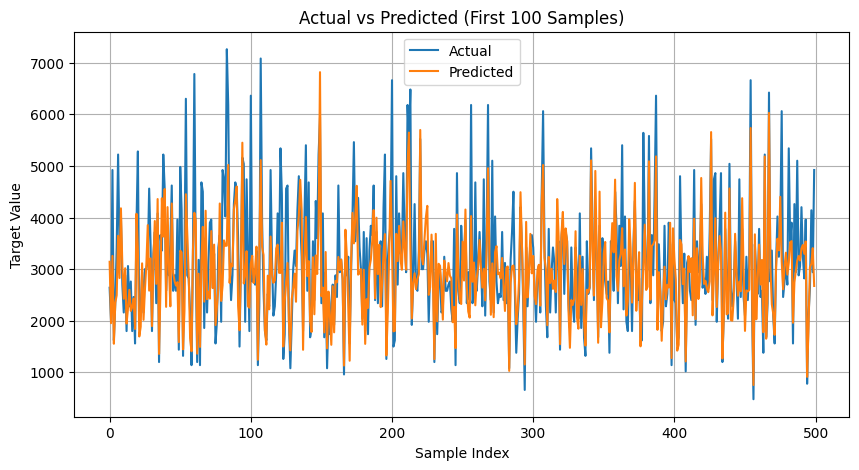

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test_actual[:500], label='Actual')
plt.plot(y_pred[:500], label='Predicted')
plt.legend()
plt.title('Actual vs Predicted (First 100 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.grid(True)
plt.show()

#### Test the model on sample data

In [62]:
# Sample input in original scale
sample_input = np.array([[38.0, 63631]])  # make sure it's 2D

# Scale the input using the same scaler used for training
sample_input_scaled = scaler.transform(sample_input)

# Predict (output will be in scaled target)
pred_scaled = model.predict(sample_input_scaled)

# Inverse transform to get back to original target scale
pred_actual = y_scaler.inverse_transform(pred_scaled)

print("Predicted ETA (actual scale):", pred_actual[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted ETA (actual scale): 3609.9753


c:\Users\mbint\anaconda3\envs\bangkit\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
